In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

import missingno as msn
import os
import joblib
import urllib
import tarfile

# DataSet

In [6]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
PATH = os.path.join("datasets", "housing")
URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [7]:
def fetch_data(housing_url=URL, housing_path=PATH):
    ''' downlaoding the  dataset
    '''

    # check for directory
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)

    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)

    # as it is an Archive
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_data(housing_url=URL, housing_path=PATH)

In [8]:
df_housing_path = os.path.join(PATH, 'housing.csv')
df = pd.read_csv(df_housing_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
df['housing_median_age'].mean()

np.float64(28.639486434108527)

<Axes: xlabel='ocean_proximity', ylabel='count'>

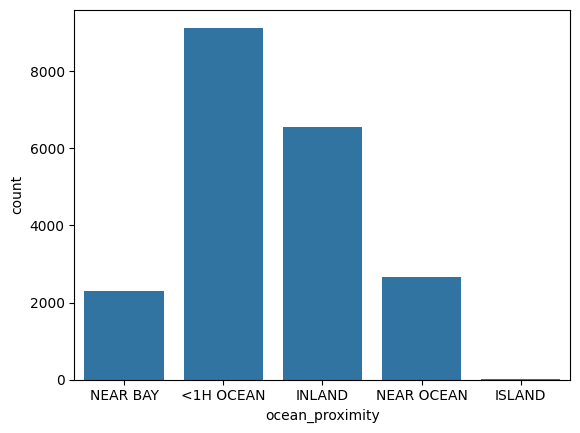

In [16]:
sns.countplot(x =df['ocean_proximity'])

In [17]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='median_income', ylabel='total_bedrooms'>

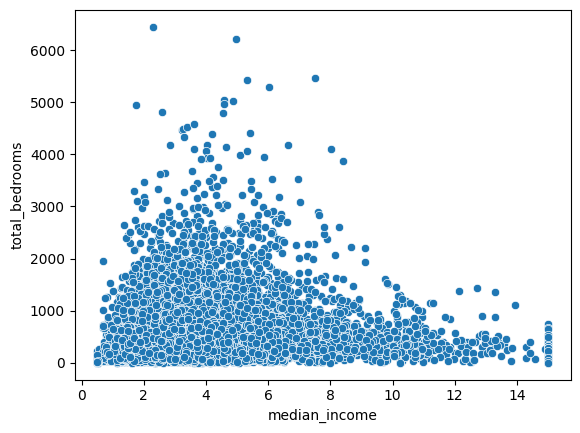

In [19]:
sns.scatterplot(data =df, x= 'median_income', y='total_bedrooms')

<Axes: xlabel='median_income', ylabel='median_house_value'>

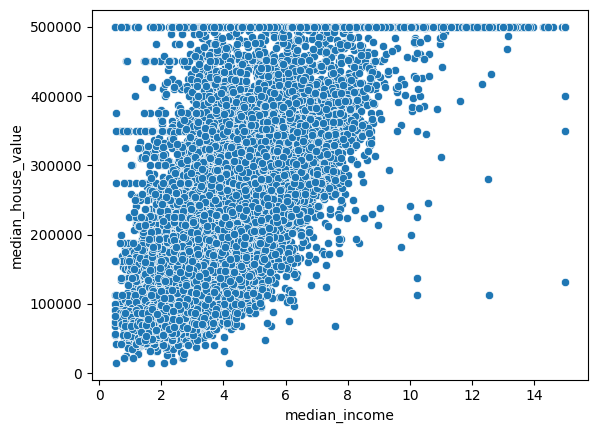

In [20]:
sns.scatterplot(data =df, x= 'median_income', y='median_house_value')

# Split dataSet

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [61]:
X = df.drop(columns='median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline

In [65]:
nums_columns = [col for col in X_train.columns
                if X_train[col].dtype in ['float64', 'int64']]
nums_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [66]:
categorical_cols = [col for col in X_train.columns
                    if X_train[col].dtype in ['object']]
categorical_cols

['ocean_proximity']

In [33]:
#imputer = SimpleImputer(strategy='median')
#X[nums_columns] = imputer.fit_transform(X[nums_columns])

#imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348])

<Axes: >

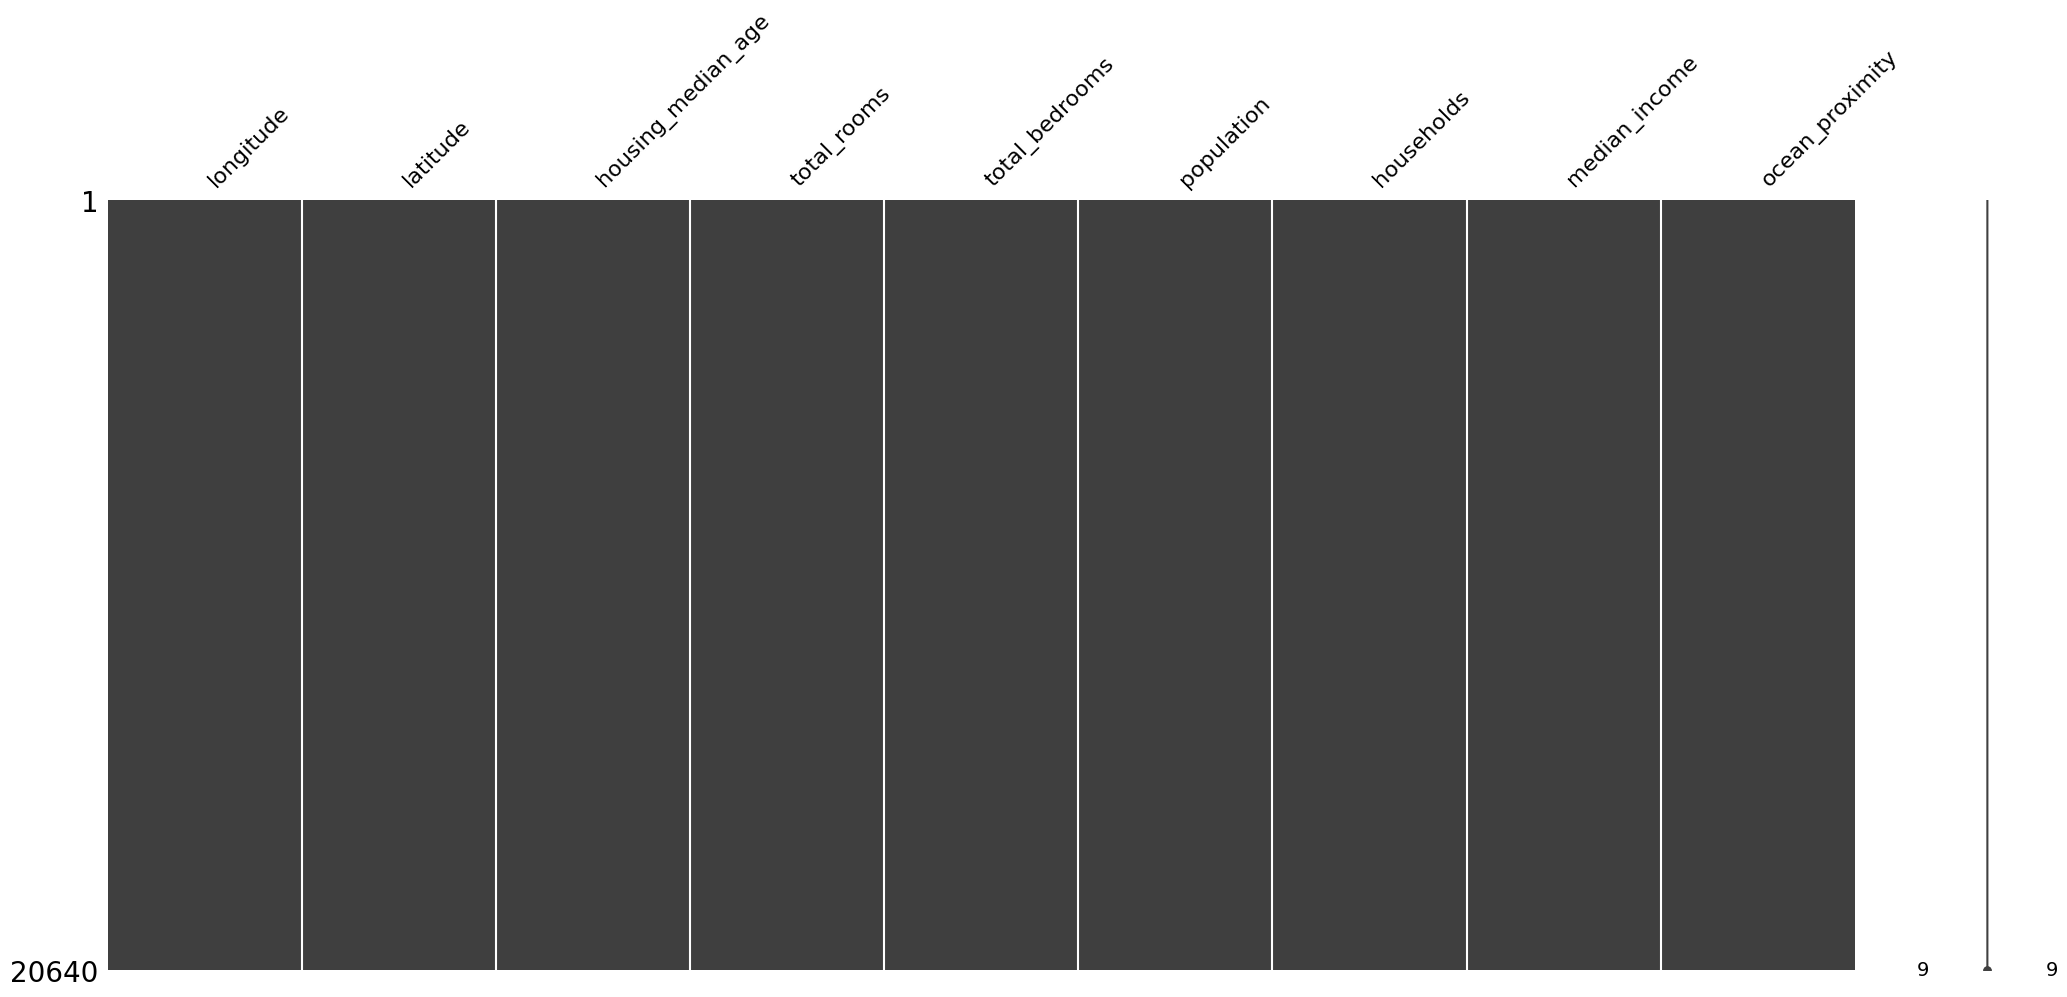

In [37]:
#msn.matrix(X)

In [40]:
# handling Categorical Column
#encoder = LabelEncoder()
#y_encoded = encoder.fit_transform(y)
#y_encoded

array([3665, 3074, 3017, ...,  508,  432,  479])

In [81]:
nums_indices = df.columns.get_indexer(nums_columns)
nums_indices

array([0, 1, 2, 3, 4, 5, 6, 7])

In [86]:
cats_indices = df.columns.get_indexer(categorical_cols)
cats_indices-1

array([8])

In [90]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scalar', StandardScaler())
])

# Column transformer
pipeline = ColumnTransformer([
    ('numerical', num_pipeline, nums_indices),
    ('categorical', OrdinalEncoder(), cats_indices-1)
])

In [91]:
pipeline

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scalar',
                                                  StandardScaler())]),
                                 array([0, 1, 2, 3, 4, 5, 6, 7])),
                                ('categorical', OrdinalEncoder(), array([8]))])

In [92]:
X_train = pipeline.fit_transform(X_train)

In [94]:
X_train = pd.DataFrame(X_train)

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16512 non-null  float64
 1   1       16512 non-null  float64
 2   2       16512 non-null  float64
 3   3       16512 non-null  float64
 4   4       16512 non-null  float64
 5   5       16512 non-null  float64
 6   6       16512 non-null  float64
 7   7       16512 non-null  float64
 8   8       16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


# Model training

** Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [97]:
# Linear Regression

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [109]:
X_test_transformed = pipeline.fit_transform(X_test)
y_pred_linear_reg = linear_regression_model.predict(X_test_transformed)
y_pred_linear_reg

array([ 64438.60196472, 155749.74805601, 255249.01263761, ...,
       445618.99953622, 132924.07361504, 177700.01650828])

In [110]:
mse = mean_squared_error(y_test, y_pred_linear_reg)
rmse = mse ** 0.5
print("RMSE:", rmse)

RMSE: 71216.32938243504


** Decision Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [116]:
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(X_train,y_train)

DecisionTreeRegressor()

In [117]:
decision_tree_predict_y = decision_tree_regression.predict(X_test_transformed)


In [118]:
dec_tree_rms = (mean_squared_error(y_test, decision_tree_predict_y))**0.5
print('RMS for DecisionTree : ', dec_tree_rms)

RMS for DecisionTree :  84483.9628714577


** Random Forest

In [119]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_train)

rmse_forest_model = (mean_squared_error(y_train, y_pred_forest))**0.5
print('RMSE for Random Forest', rmse_forest_model)

RMSE for Random Forest 18518.296793114525
